# Desafio: Prever a nota de matemática do Enem 2016

In [1]:
#importando bibliotecas para análise dos dados
import pandas as pd
import numpy as np

In [2]:
# visualização
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#datasets
df = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

pd.options.display.max_columns = None

In [4]:
#visualizando os dados
df.head(10)

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

In [5]:
df.tail()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
13725,4582,aadf671ef8c1c6efa42e69432093ab83c17a52ac,2016,3502903,Araçoiaba da Serra,35,SP,20,M,0.0,1,1,3552205.0,Sorocaba,35.0,SP,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,3502903,Araçoiaba da Serra,35,SP,1,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,438.2,419.7,394.5,403.2,DDABDCDBBDBACDCECDCBEBCDCEBBDABDCACDEABDECDBC,BDEDCADCEBBCAAEBDBECACACABDBDBABCABECADDDBEAC,ACDDB99999BBDACBECAAEDBCCDAECBDECCABDDAEEEBAEC...,ECDABADBAEDDBEAEADCACDBCCADCDBCCEBEDBDBDABDCA,0,EADBDCCBADBEBCEBCABDEBEEBECADDBEACACDDBCADCCA,EDDBDDACDCEDDACBBBCBCDCECADBEEBAAADECAECCBCAD,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,80.0,80.0,40.0,440.0,E,E,B,B,4,G,A,B,C,B,A,B,A,B,A,B,A,A,C,B,B,E,B,B,B,B,C,A,5.0,5.0,5.0,5.0,5.0,5,5,5,5,5,5,5,NaN,A,A,A,A,A,A,A,A,A
13726,4583,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,2016,2613800,São Vicente Ferrer,26,PE,33,F,0.0,3,2,NaN,NaN,NaN,NaN,1,10,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2616308,Vicência,26,PE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,423.8,557.9,533.0,452.4,BDBBBDBCEAECCCAEAADEEBEADADCCACCABDDCAEDCDBDC,DCECBBBCAAEBCCAABBEDCDCBDBAABADDDADBAADADEBEB,99999CCABCABDEEEECCCECADDBBECCEAAACAABABABBDDB...,BAAEDBCB.CABCABEEBCAECAABCBDACEACCDCBBEAAACEA,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,EDECACCBBEDEBBBDABCBBCCEBADCEBAAEAAEDCBCABDBAB...,CEECDBDADEBCCEBABECEACB

In [6]:
#visualizando os dados
df_test.head(10)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A
5,e656d6bad65c93fb2880f1eba5037008c8e75774,43,RS,18,M,3,1,1,1,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,414.5,568.5,542.5,1,1.0,120.0,120.0,120.0,120.0,80.0,560.0,E,E,C,B,B,A,NaN,A
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,35,SP,17,F,1,1,2,0,3,1.0,0,4.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,485.7,654.6,606.6,0,1.0,140.0,120.0,120.0,120.0,120.0,620.0,D,E,H,D,B,A,NaN,D
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,23,CE,17,F,3,2,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,423.2,521.0,451.8,0,1.0,100.0,80.0,80.0,100.0,60.0,420.0,D,C,B,A,A,A,NaN,A
8,043c544a2104aa8a9849f1a703a08d37a2f16839,51,MT,18,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,414.4,577.6,548.6,1,1.0,120.0,160.0,160.0,140.0,160.0,740.0,B,D,C,A,A,B,D,A
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,15,PA,17,M,3,2,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,456.8,518.5,488.7,0,1.0,120.0,120.0,120.0,120.0,100.0,580.0,B,C,B,A,A,A,NaN,A


In [7]:
df_test.tail()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,41,PR,17,F,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,398.3,558.2,511.6,0,1.0,120.0,120.0,120.0,100.0,40.0,500.0,E,E,D,A,B,A,NaN,A
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,35,SP,17,M,2,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,427.6,579.7,471.1,1,1.0,100.0,100.0,100.0,120.0,100.0,520.0,C,C,C,A,A,A,NaN,A
4573,655fa6306720ff16e825903b5422a46608a77545,35,SP,19,M,1,1,1,2,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,639.2,643.8,604.9,0,1.0,160.0,140.0,120.0,140.0,80.0,640.0,D,F,D,B,B,A,NaN,D
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,52,GO,17,M,2,2,3,0,1,NaN,1,NaN,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,427.1,467.9,540.2,1,1.0,140.0,80.0,80.0,140.0,80.0,520.0,C,E,C,A,A,A,NaN,A
4575,adf0d15b54317b6564ef56dad2b775bbb0ef50cc,33,RJ,30,M,1,1,1,10,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,A,B,B,B,B,A


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [9]:
#filtrando as colunas e definindo um "novo" dataset
df[['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']].describe().round(2)

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC
count,10133.00,10133.00,10133.00,10133.00,10133.00,10133.00,10133.00,10341.00,10341.00,10133.00
mean,119.81,111.92,106.82,113.12,77.37,529.05,482.50,473.50,529.66,516.47
std,29.85,33.74,34.34,33.48,43.07,154.29,99.83,71.09,73.73,68.69
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,120.00,100.00,80.00,100.00,40.00,440.00,408.90,419.90,480.40,468.10
50%,120.00,120.00,120.00,120.00,80.00,540.00,461.20,459.80,532.00,520.90
75%,140.00,120.00,120.00,120.00,100.00,600.00,537.60,514.50,581.20,564.90
max,200.00,200.00,200.00,200.00,200.00,1000.00,952.00,806.40,807.00,763.60


<AxesSubplot:xlabel='SG_UF_RESIDENCIA', ylabel='count'>

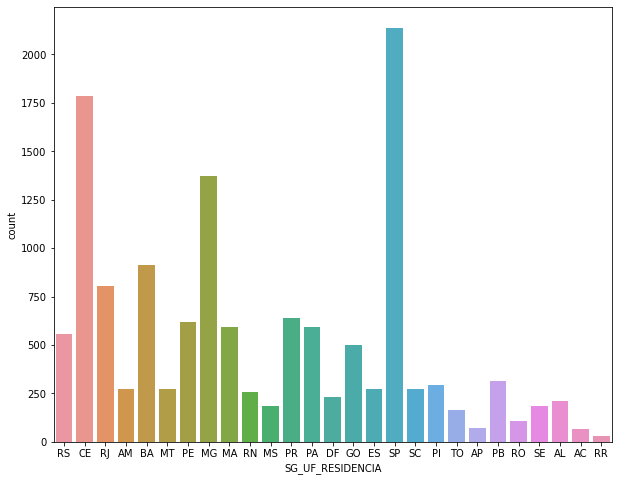

In [10]:
#gráfico relacionando os estados de residência de cada participante com as inscrições
plt.rc('figure', figsize = (10,8))
sns.countplot(df['SG_UF_RESIDENCIA'])

Podemos notar:

- A maioria dos candidatos são respectivamente de São Paulo, Ceará e Minas Gerais.

<AxesSubplot:xlabel='TP_SEXO', ylabel='count'>

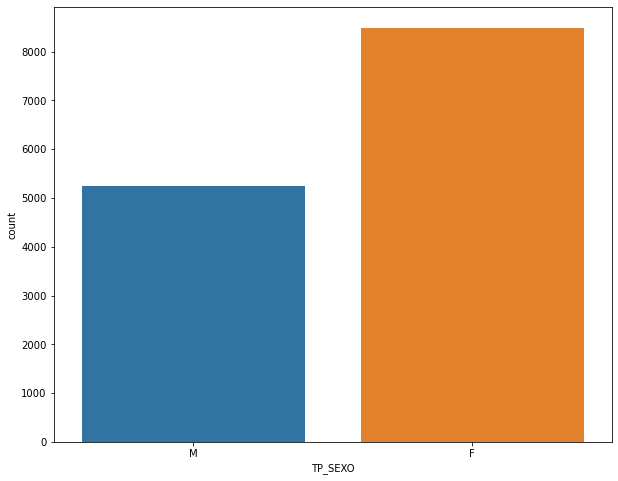

In [11]:
#gráfico relacionando gênero com quantidade de inscrições
sns.countplot(df['TP_SEXO'])

Podemos também notar:
- A maioria dos inscritos são do sexo feminino

<AxesSubplot:xlabel='NU_IDADE', ylabel='count'>

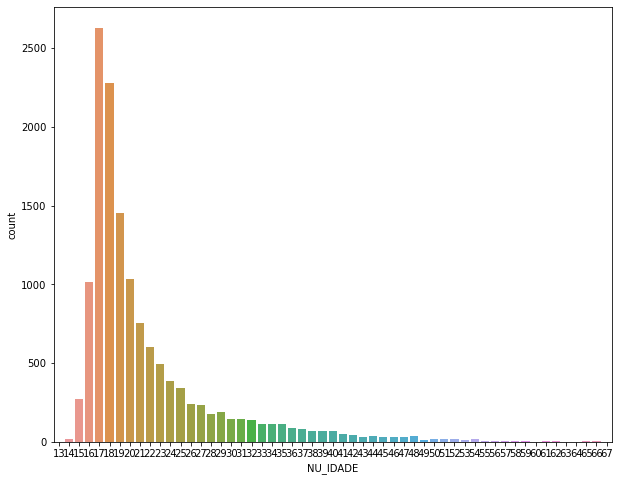

In [12]:
#gráfico relacionando idade com a quantidade de inscrições
sns.countplot(df['NU_IDADE'])

Podemos notar ainda:
- Grande maioria tem em média 17 e 18 anos

##### Quantas pessoas fizeram a prova de matemática?

In [13]:
#contagem dos valores
pessoas_mt = df['TP_PRESENCA_MT'].value_counts()
pessoas_mt

1    10133
0     3592
2        5
Name: TP_PRESENCA_MT, dtype: int64

In [14]:
df.shape[0]

13730

In [15]:
#calculando a porcentagem de inscritos que fizeram a prova
porcent_pessoas_mt = (pessoas_mt[1]*100)/df.shape[0]
porcent_pessoas_mt

73.80189366351055

In [16]:
df.shape[0]

13730

73.80189366351055% dos inscritos fizeram a prova de matemática

In [17]:
df[df['NU_NOTA_MT'].isnull()].shape[0]

3597

In [18]:
df[df['NU_NOTA_MT'].isnull()].shape[0]

3597

In [19]:
df[df['NU_NOTA_MT']==0].shape[0]

10

3597 pessoas não fizeram a prova de matemática e 10 pessoas zeraram a prova

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='Density'>

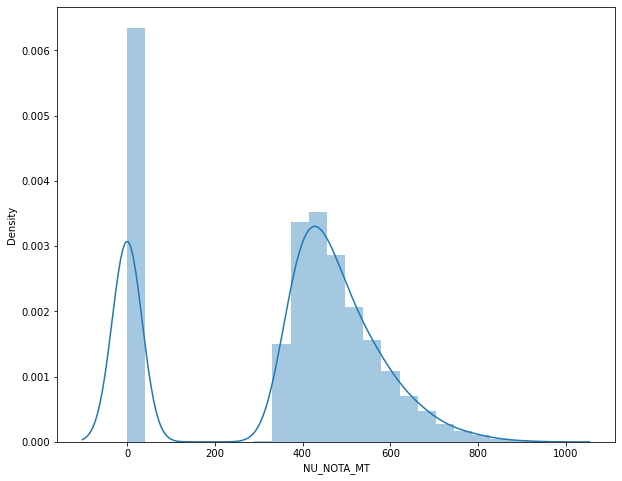

In [20]:
#gráfico com a distribuição das notas de matemática
mat_min = df['NU_NOTA_MT'].min()
df.update(df['NU_NOTA_MT'].fillna(mat_min)) #substituindo todos os valores nulos por 0
sns.distplot(df['NU_NOTA_MT'])

In [21]:
#descrição para análise
df['NU_NOTA_MT'].describe()

count    13730.000000
mean       356.092607
std        228.844193
min          0.000000
25%          0.000000
50%        422.500000
75%        504.400000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

In [22]:
df['NU_NOTA_MT'].median()

422.5

Sendo assim:
- A média das notas está abaixo dos 400 pontos.
- Grande maioria das notas estão entre 400 e 600 pontos. 
- Grande parte dos dados estão distribuídos bem próximos a média das notas que é 482
- A maior nota foi 952 pontos

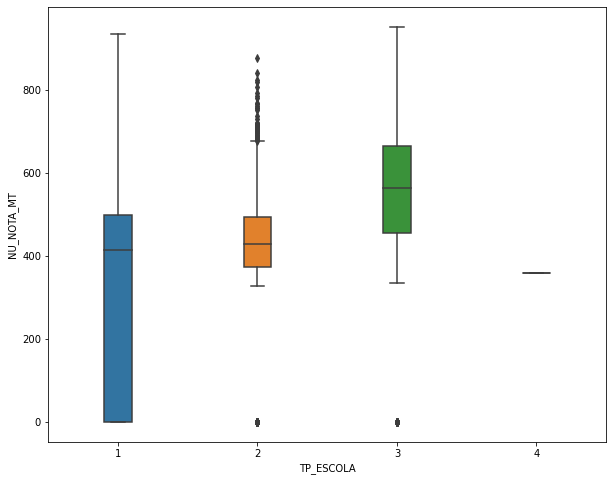

In [23]:
#boxplot relacionando tipo de escola com as notas
ax = sns.boxplot(x=df.TP_ESCOLA, y=df.NU_NOTA_MT,orient='v',width=0.2)

- Não respoderam
- Alunos de escola pública
- Alunos de escolas particulares
- Alunos de escolas do exterior

Portanto, os alunos de escolas particulares tiraram as maiores notas em matemática

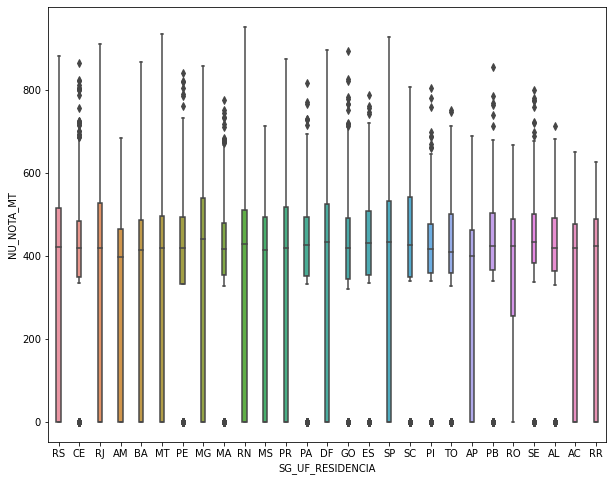

In [24]:
#boxplot relacionando estado de residência com as notas
ax = sns.boxplot(x=df.SG_UF_RESIDENCIA, y=df.NU_NOTA_MT,orient='v',width=0.2)

- Os alunos dos estados do RS, RJ, AM, BA, MT, RN, MS, PR, DF,SP, AP, AC, RR e RO tiraram notas em matemática abaixo da mediana.
- Os alunos dos estados de SC, TO, PB, AL e SE tiraram notas acima da mediana.


In [25]:
# df_final = df[['NU_NOTA_MT','TP_ESCOLA','TP_PRESENCA_CN', 'TX_GABARITO_MT','TX_RESPOSTAS_MT','NU_IDADE','TP_ST_CONCLUSAO'
#              ,'TP_ANO_CONCLUIU', 'TP_ENSINO','IN_TREINEIRO','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC'
#              ,'IN_SEM_RECURSO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_REDACAO'
#              ,'Q035','Q036','Q037','Q038','Q040','Q041']]
df_final = df[['TP_ESCOLA','TP_PRESENCA_CH','TP_PRESENCA_CN','TP_PRESENCA_LC','NU_NOTA_MT','NU_IDADE','TP_ST_CONCLUSAO'
             ,'TP_ANO_CONCLUIU', 'TP_ENSINO','IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','TP_STATUS_REDACAO','NU_NOTA_REDACAO','TP_PRESENCA_MT']]
df_final.head()

,TP_ESCOLA,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,NU_NOTA_MT,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_STATUS_REDACAO,NU_NOTA_REDACAO,TP_PRESENCA_MT
0,1,1,1,1,399.4,24,1,4,NaN,0,436.3,495.4,581.2,1.0,520.0,1
1,2,1,1,1,459.8,17,2,0,1.0,0,474.5,544.1,599.0,1.0,580.0,1
2,1,0,0,0,0.0,21,3,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0
3,1,0,0,0,0.0,25,1,9,NaN,0,NaN,NaN,NaN,NaN,NaN,0
4,1,0,0,0,0.0,28,1,4,NaN,0,NaN,NaN,NaN,NaN,NaN,0


In [26]:
df_final.select_dtypes(['object']).columns

Index([], dtype='object')

In [27]:
df_final = df_final.fillna(value=0)
df_test = df_test.fillna(value=0)
df_final.isnull().values.any()

False

In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TP_ESCOLA          13730 non-null  int64  
 1   TP_PRESENCA_CH     13730 non-null  int64  
 2   TP_PRESENCA_CN     13730 non-null  int64  
 3   TP_PRESENCA_LC     13730 non-null  int64  
 4   NU_NOTA_MT         13730 non-null  float64
 5   NU_IDADE           13730 non-null  int64  
 6   TP_ST_CONCLUSAO    13730 non-null  int64  
 7   TP_ANO_CONCLUIU    13730 non-null  int64  
 8   TP_ENSINO          13730 non-null  float64
 9   IN_TREINEIRO       13730 non-null  int64  
 10  NU_NOTA_CN         13730 non-null  float64
 11  NU_NOTA_CH         13730 non-null  float64
 12  NU_NOTA_LC         13730 non-null  float64
 13  TP_STATUS_REDACAO  13730 non-null  float64
 14  NU_NOTA_REDACAO    13730 non-null  float64
 15  TP_PRESENCA_MT     13730 non-null  int64  
dtypes: float64(7), int64(9

##### Modelo de Regressão linear 

In [29]:
#machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
modelo = LinearRegression()

In [31]:
y = df_final['NU_NOTA_MT']

X = df_final[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','TP_PRESENCA_MT']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [33]:
X_train.shape

(9611, 5)

In [34]:
X_test.shape

(4119, 5)

In [35]:
modelo.fit(X_train, y_train)

LinearRegression()

In [36]:
#R ao quadrado
modelo.score(X_train,y_train)

0.9032528913166321

In [37]:
lm = modelo.predict(X_test)

In [38]:
metrics.r2_score(y_test,lm).round(2)

0.91

#### Analisando os valores de treino

In [39]:
index = ['INTERCEPT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','TP_PRESENCA_MT']
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_), index=index,columns=['Parametros'])



,Parametros
INTERCEPT,-5.255134
NU_NOTA_CN,0.335875
NU_NOTA_CH,-0.135485
NU_NOTA_LC,0.560740
NU_NOTA_REDACAO,0.083826
TP_PRESENCA_MT,66.414155


In [40]:
#Predição do modelo
y_predict_train = modelo.predict(X_train)

<AxesSubplot:title={'center':'Nota Previsão X Real'}, xlabel='Previsto', ylabel='Real'>

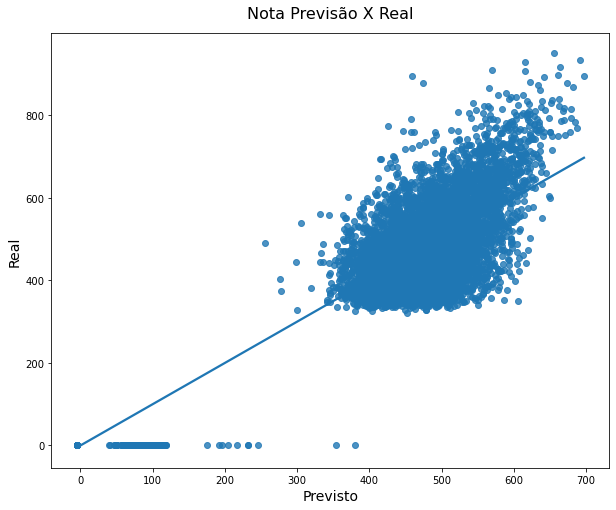

In [41]:
ax = sns.regplot(x = y_predict_train,y=y_train)
ax.set_title('Nota Previsão X Real', fontsize=16, y=1.02)
ax.set_xlabel("Previsto", fontsize=14)
ax.set_ylabel("Real", fontsize=14)
ax

#### Fazendo o teste do modelo

In [42]:
y_predict = modelo.predict(X_test)

In [43]:
metrics.r2_score(y_test,y_predict).round(2)

0.91

In [44]:
EQM = metrics.mean_squared_error(y_test,y_predict)
EQM

5012.561231529389

Text(0, 0.5, 'Resíduos')

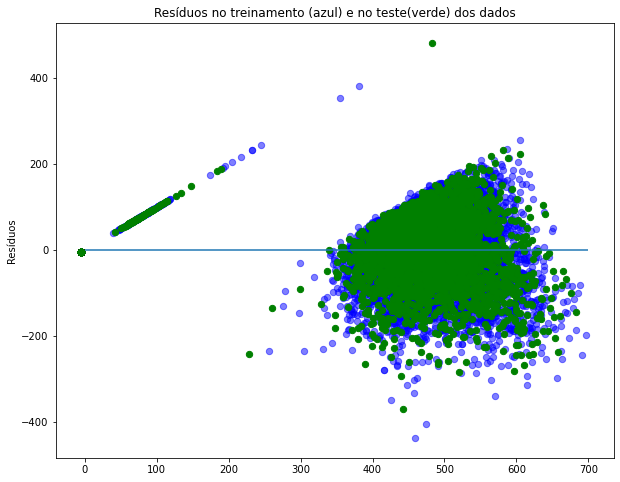

In [45]:
#Verificando os resíduos
residuo_train = y_predict_train - y_train
residuo_test = y_predict - y_test
plt.scatter(y_predict_train, residuo_train, c='b',s=40,alpha=0.5)
plt.scatter(y_predict,residuo_test, c='g',s=40)
plt.hlines(y=0,xmin=0,xmax=700)

plt.title('Resíduos no treinamento (azul) e no teste(verde) dos dados')
plt.ylabel('Resíduos')

#### Modelo 2

In [46]:
modelo2 = LinearRegression()

In [47]:
y = df_final['NU_NOTA_MT']

X = df_final[['TP_ESCOLA','TP_PRESENCA_CH','TP_PRESENCA_CN','TP_PRESENCA_LC','NU_IDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU', 'TP_ENSINO','IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','TP_STATUS_REDACAO','NU_NOTA_REDACAO','TP_PRESENCA_MT']]



In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [49]:
X_train.shape

(9611, 15)

In [50]:
modelo2.fit(X_train, y_train)

LinearRegression()

In [51]:
modelo2.score(X_train,y_train)

0.9095752003742819

In [52]:
predict2 = modelo2.predict(X_test)
metrics.r2_score(y_test,predict2).round(2)

0.91

In [53]:
EQM = metrics.mean_squared_error(y_test,predict2)
EQM

4615.262114741294

## Testando o modelo com os valores de test.csv

In [54]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [55]:
test = df_test[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','TP_PRESENCA_LC']]
math_predict = modelo.predict(test)
df_test['NU_NOTA_MT'] = math_predict
math_predict

array([434.5205467 , 481.88757757, 547.8347355 , ..., 581.46531005,
       487.71899694,  -5.2551336 ])